In [149]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Load the data
df = pd.read_csv('CA1-Regression-Dataset.csv')


PREPROCESSING OF DATA

In [150]:

print(df)
df.describe()


        ID  Age  Gender     BMI Smoker     Region     Cost ($)
0        1   19  female  27.900    yes  southwest  16884.92400
1        2   18    male  33.770     no  southeast   1725.55230
2        3   28    male  33.000     no  southeast   4449.46200
3        4   33    male  22.705     no  northwest  21984.47061
4        5   32    male  28.880     no  northwest   3866.85520
...    ...  ...     ...     ...    ...        ...          ...
1333  1334   50    male  30.970     no  northwest  10600.54830
1334  1335   18  female  31.920     no  northeast   2205.98080
1335  1336   18  female  36.850     no  southeast   1629.83350
1336  1337   21  female  25.800     no  southwest   2007.94500
1337  1338   61  female  29.070    yes  northwest  29141.36030

[1338 rows x 7 columns]


,ID,Age,BMI,Cost ($)
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,13270.422265
std,386.391641,14.049960,6.098187,12110.011237
min,1.000000,18.000000,15.960000,1121.873900
25%,335.250000,27.000000,26.296250,4740.287150
50%,669.500000,39.000000,30.400000,9382.033000
75%,1003.750000,51.000000,34.693750,16639.912515
max,1338.000000,64.000000,53.130000,63770.428010


In [151]:
# Separate the features and the target variable
X = df.drop('Cost ($)', axis=1)
y = df['Cost ($)']

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



LINEAR REGRESSION MODEL

In [152]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Get feature names after one-hot encoding
feature_names = X.columns

# Get the coefficients from the linear regression model
coefficients = model.coef_

# Calculate the absolute values of coefficients for feature importance
feature_importance = np.abs(coefficients)

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Get the top features and their importance scores
top_features = feature_names[sorted_idx]
top_importance = feature_importance[sorted_idx]



In [153]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('\nLinear Regression Metrics:')
print('Mean Squared Error (MSE):', mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

# Calculate adjusted R-squared
n = len(X_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print('Adjusted R-squared:', adjusted_r2)




Linear Regression Metrics:
Mean Squared Error (MSE): 42310074.32815766
R-squared: 0.7419345329600768
Adjusted R-squared: 0.7308457824232051


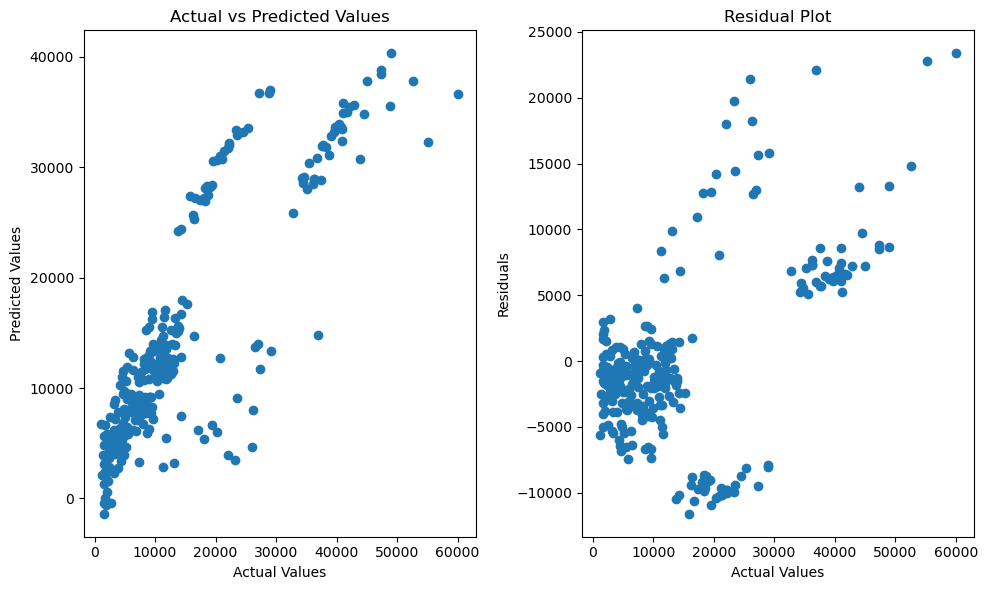

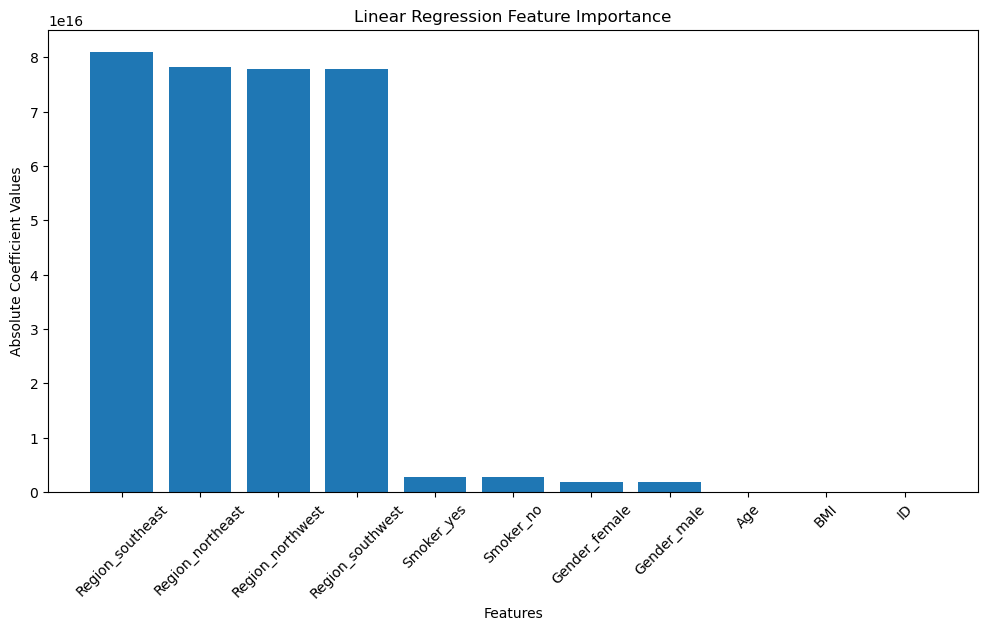

In [154]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

# Display the plots
plt.tight_layout()
plt.show()

# Plot the feature importance graph
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_features)), top_importance, align='center')
plt.xticks(range(len(top_features)), top_features, rotation=45)
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Values')
plt.title('Linear Regression Feature Importance')
plt.show()


RIDGE REGRESSION MODEL


In [155]:
from sklearn.linear_model import Ridge

# Train the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [156]:
# Get the coefficients from the Ridge regression model
ridge_coefficients = ridge_model.coef_

# Calculate the magnitude of coefficients for feature importance
ridge_feature_importance = np.abs(ridge_coefficients)

# Sort feature importance in descending order
ridge_sorted_idx = np.argsort(ridge_feature_importance)[::-1]

# Get the top features and their importance scores
ridge_top_features = feature_names[ridge_sorted_idx]
ridge_top_importance = ridge_feature_importance[ridge_sorted_idx]


# Calculate adjusted R-squared
adjusted_r2_ridge = 1 - (1 - r2_ridge) * ((n - 1) / (n - p - 1))

# Print metrics for Ridge Regression
print('\nRidge Regression Metrics:')
print('Mean Squared Error (MSE):', mse_ridge)
print('Mean Absolute Error (MAE):', mae_ridge)
print('R-squared:', r2_ridge)
print('Adjusted R-squared:', adjusted_r2_ridge)


Ridge Regression Metrics:
Mean Squared Error (MSE): 42270558.91659634
Mean Absolute Error (MAE): 4653.687350807044
R-squared: 0.7421755527006888
Adjusted R-squared: 0.7310971584807966


In [157]:
from sklearn.model_selection import GridSearchCV

# Define alpha values for Ridge regression
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Create a parameter grid
param_grid = {'alpha': alphas}

# Initialize Ridge regression model
ridge_model_tuned = Ridge()

# Perform Grid Search Cross Validation
ridge_grid = GridSearchCV(ridge_model_tuned, param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_alpha_ridge = ridge_grid.best_params_['alpha']

# Train the Ridge regression model with the best hyperparameters
ridge_model_tuned = Ridge(alpha=best_alpha_ridge)
ridge_model_tuned.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_ridge_tuned = ridge_model_tuned.predict(X_test_scaled)

# Evaluate the tuned Ridge model
mse_ridge_tuned = mean_squared_error(y_test, y_pred_ridge_tuned)
mae_ridge_tuned = mean_absolute_error(y_test, y_pred_ridge_tuned)
r2_ridge_tuned = r2_score(y_test, y_pred_ridge_tuned)

# Print metrics for Tuned Ridge Regression
print('\nTuned Ridge Regression Metrics:')
print('Best alpha:', best_alpha_ridge)
print('Mean Squared Error (MSE):', mse_ridge_tuned)
print('Mean Absolute Error (MAE):', mae_ridge_tuned)
print('R-squared:', r2_ridge_tuned)



Tuned Ridge Regression Metrics:
Best alpha: 10
Mean Squared Error (MSE): 42301834.67722325
Mean Absolute Error (MAE): 4659.512282618435
R-squared: 0.7419847897700778


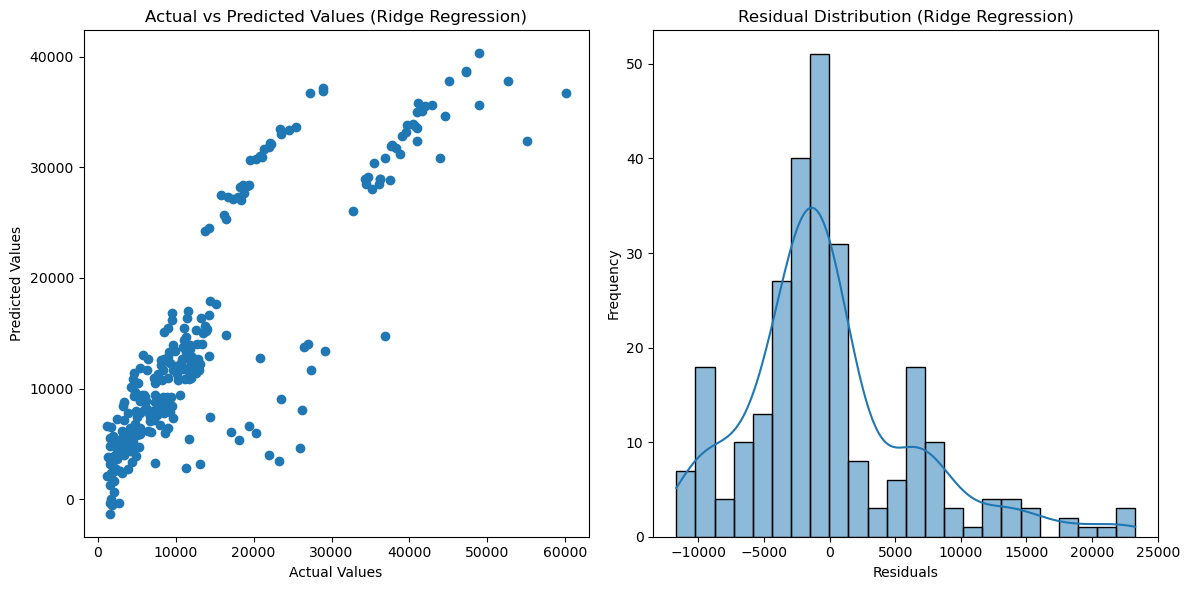

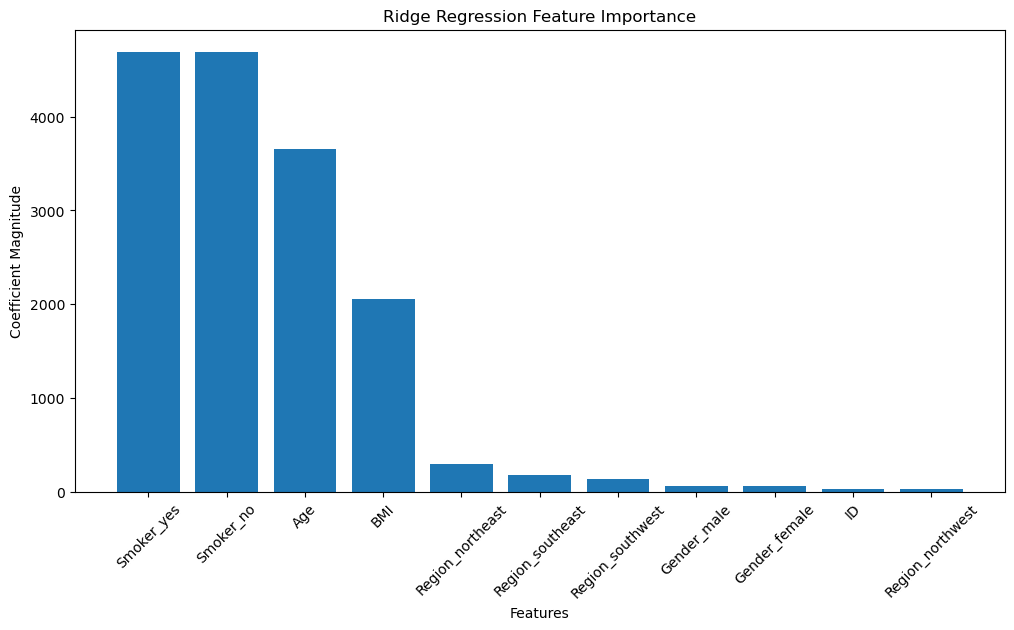

In [158]:
# Residual Plot for Ridge Regression
residuals_ridge = y_test - y_pred_ridge
plt.figure(figsize=(12, 6))

# Scatter plot of actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge)
plt.title('Actual vs Predicted Values (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Residual plot
plt.subplot(1, 2, 2)
sns.histplot(residuals_ridge, kde=True)
plt.title('Residual Distribution (Ridge Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

# Plot the Ridge regression feature importance graph
plt.figure(figsize=(12, 6))
plt.bar(range(len(ridge_top_features)), ridge_top_importance, align='center')
plt.xticks(range(len(ridge_top_features)), ridge_top_features, rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Ridge Regression Feature Importance')
plt.show()


RANDOM FOREST REGRESSION MODEL


In [159]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate adjusted R-squared
adjusted_r2_rf = 1 - (1 - r2_rf) * ((n - 1) / (n - p - 1))

In [160]:
# Get feature importance from the Random Forest model
rf_feature_importance = rf_model.feature_importances_

# Sort feature importance in descending order
rf_sorted_idx = np.argsort(rf_feature_importance)[::-1]

# Get the top features and their importance scores
rf_top_features = feature_names[rf_sorted_idx]
rf_top_importance = rf_feature_importance[rf_sorted_idx]


In [161]:
# Print metrics for Random Forest Regression
print('\nRandom Forest Regression Metrics:')
print('Mean Squared Error (MSE):', mse_rf)
print('Mean Absolute Error (MAE):', mae_rf)
print('R-squared:', r2_rf)
print('Adjusted R-squared:', adjusted_r2_rf)


Random Forest Regression Metrics:
Mean Squared Error (MSE): 28000271.834058598
Mean Absolute Error (MAE): 3103.0963588749996
R-squared: 0.8292155392576976
Adjusted R-squared: 0.8218771444601769


In [162]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf_model_tuned = RandomForestRegressor(random_state=42)

# Perform Randomized Search Cross Validation
rf_random = RandomizedSearchCV(rf_model_tuned, param_distributions=param_grid_rf, 
                               n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42)
rf_random.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_rf = rf_random.best_params_

# Train the Random Forest model with the best hyperparameters
rf_model_tuned = RandomForestRegressor(random_state=42, **best_params_rf)
rf_model_tuned.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rf_tuned = rf_model_tuned.predict(X_test_scaled)

# Evaluate the tuned Random Forest model
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

# Print metrics for Tuned Random Forest Regression
print('\nTuned Random Forest Regression Metrics:')
print('Best hyperparameters:', best_params_rf)
print('Mean Squared Error (MSE):', mse_rf_tuned)
print('Mean Absolute Error (MAE):', mae_rf_tuned)
print('R-squared:', r2_rf_tuned)



Tuned Random Forest Regression Metrics:
Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}
Mean Squared Error (MSE): 24067683.509440664
Mean Absolute Error (MAE): 2908.8721316818674
R-squared: 0.8532019126872729


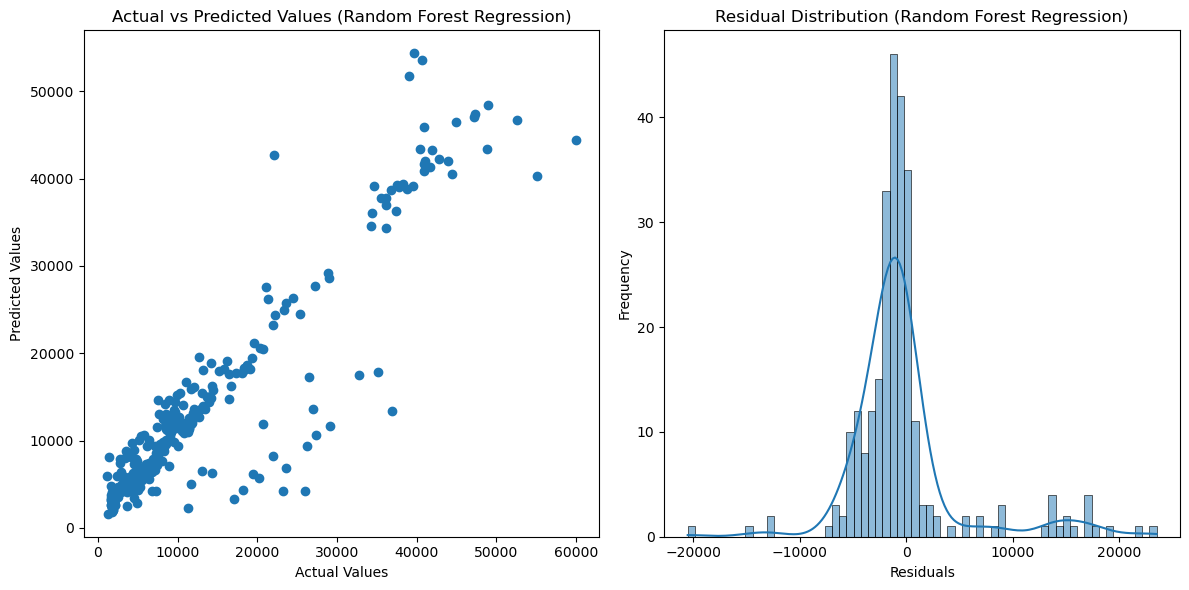

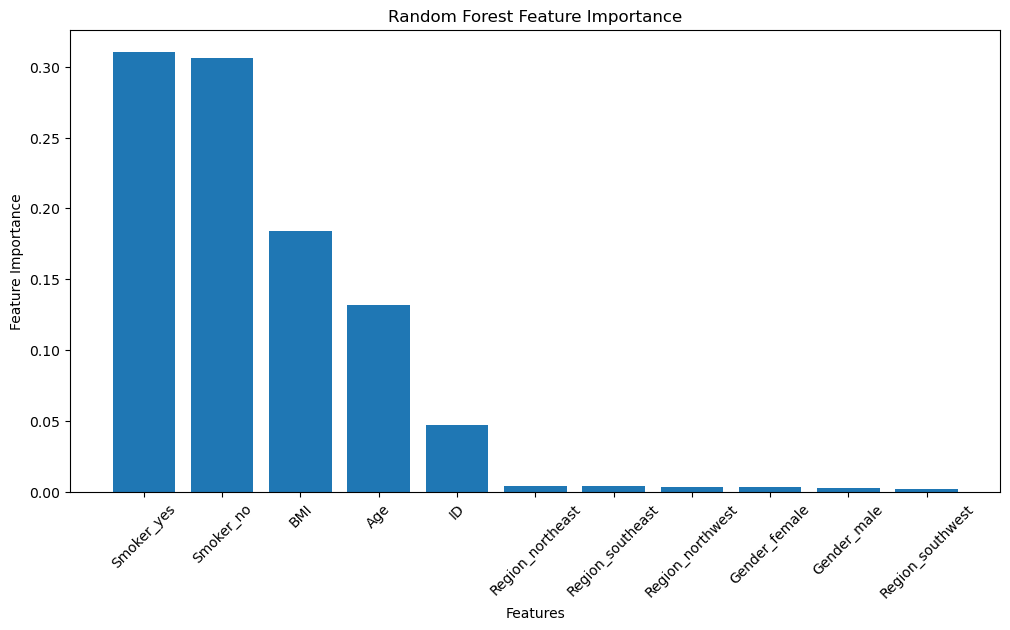

In [163]:
# Residual Plot for Random Forest Regression
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(12, 6))

# Scatter plot of actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf)
plt.title('Actual vs Predicted Values (Random Forest Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Residual plot
plt.subplot(1, 2, 2)
sns.histplot(residuals_rf, kde=True)
plt.title('Residual Distribution (Random Forest Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()


# Plot the Random Forest feature importance graph
plt.figure(figsize=(12, 6))
plt.bar(range(len(rf_top_features)), rf_top_importance, align='center')
plt.xticks(range(len(rf_top_features)), rf_top_features, rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

DUMMY MODEL

In [164]:
from sklearn.dummy import DummyRegressor

# Train the Dummy model
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_dummy = dummy_model.predict(X_test_scaled)

# Evaluate the Dummy model
mse_dummy = mean_squared_error(y_test, y_pred_dummy)
mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
r2_dummy = r2_score(y_test, y_pred_dummy)

# Print metrics for Dummy Model
print('\nDummy Model Metrics:')
print('Mean Squared Error (MSE):', mse_dummy)
print('Mean Absolute Error (MAE):', mae_dummy)
print('R-squared:', r2_dummy)



Dummy Model Metrics:
Mean Squared Error (MSE): 165371957.72603002
Mean Absolute Error (MAE): 9559.000002505336
R-squared: -0.00866737257118566


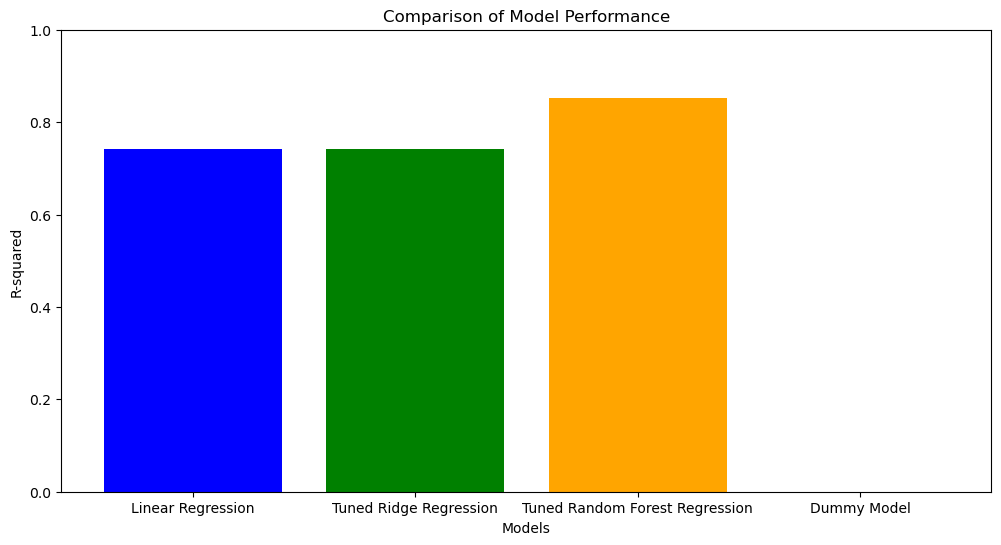

In [165]:
# Collect R-squared values for each model
r2_values = [r2, r2_ridge_tuned, r2_rf_tuned, r2_dummy]
models = ['Linear Regression', 'Tuned Ridge Regression', 'Tuned Random Forest Regression', 'Dummy Model']

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Comparison of Model Performance')
plt.ylim(0, 1)  # Set the y-axis limit for better visualization
plt.show()
